AQUI HAY QUE ENTREGAR LA MIERDA GORDA
- EL DATASET ESTÁ YA LIMPITO
- NO HAGAIS COSAS POR HACER QUE EL CODIGO SE LA SOPLA COMPLETAMENTE
-

In [41]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r'src\rawDataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [43]:
df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


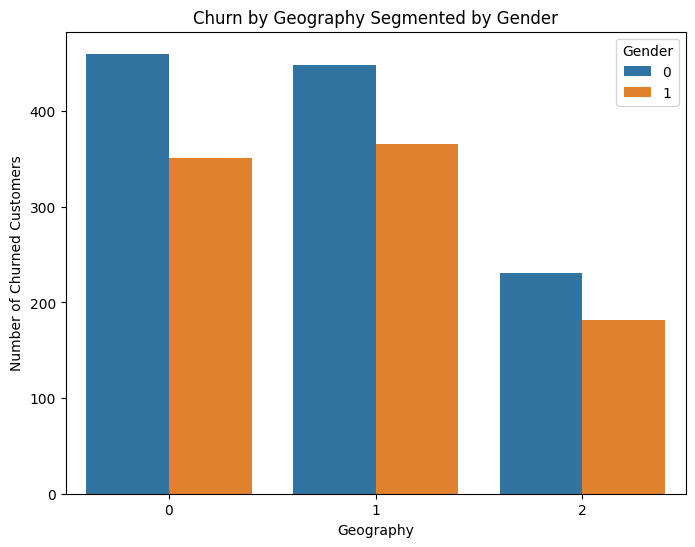

In [44]:
churned_df = df[df['Exited'] == 1]


# Plot: Churn by geography segmented by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=churned_df)
plt.title('Churn by Geography Segmented by Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.show()